In [110]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import numpy.random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas import read_csv
from sklearn.model_selection import train_test_split

data = pd.read_csv('HomworkData.csv')                # Read the dataset
data.head(500)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
1,0020-INWCK,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),95.75,6849.40,No
2,0104-PPXDV,Male,0,Yes,No,58,Yes,No,DSL,No,...,Yes,No,No,No,One year,No,Credit card (automatic),50.30,2878.55,No
3,0107-WESLM,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.85,19.85,Yes
4,0112-QAWRZ,Male,0,Yes,Yes,16,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),90.80,1442.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,9938-PRCVK,Female,0,Yes,Yes,41,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25,No
491,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
492,9953-ZMKSM,Male,0,No,No,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1559.30,No
493,9971-ZWPBF,Male,1,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.90,3625.20,No


In [111]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("HomworkData.csv", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(495, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


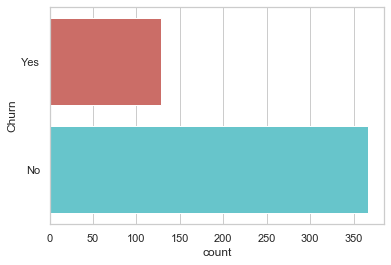

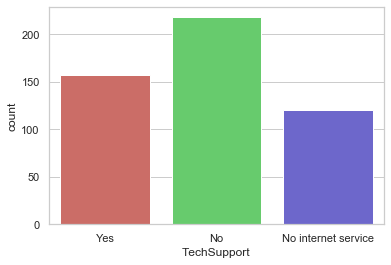

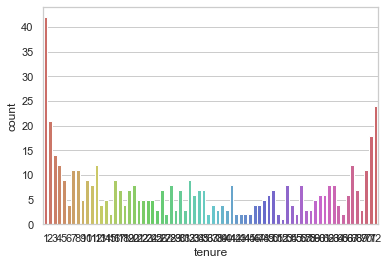

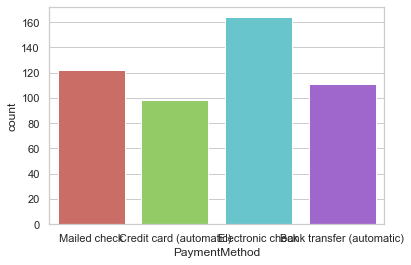

In [113]:
sns.countplot(y="Churn",data=data, palette="hls")
plt.show()

sns.countplot(x="TechSupport",data=data, palette="hls")
plt.show()

sns.countplot(x="tenure",data=data, palette="hls")
plt.show()

sns.countplot(x="PaymentMethod",data=data, palette="hls")
plt.show()

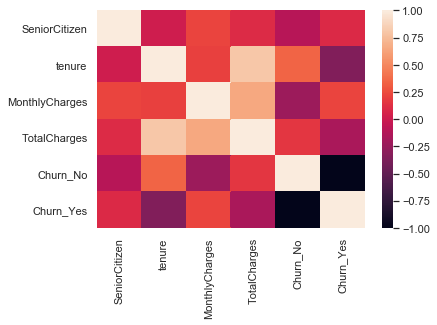

In [114]:
data2 = pd.get_dummies(data, columns =["Churn"])
sns.heatmap(data2.corr())
plt.show()

In [115]:
churn_binary = {"Churn": {"Yes":1, "No":0}}
data.replace(churn_binary, inplace=True)

In [116]:
tenure_group = {"tenure": {int(i):"short term" if i <37 else "long term"
                          for i in data["tenure"]}}

data.replace(tenure_group, inplace=True)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0013-EXCHZ,Female,1,Yes,No,short term,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,1
1,0020-INWCK,Female,0,Yes,Yes,long term,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),95.75,6849.40,0
2,0104-PPXDV,Male,0,Yes,No,long term,Yes,No,DSL,No,...,Yes,No,No,No,One year,No,Credit card (automatic),50.30,2878.55,0
3,0107-WESLM,Male,0,No,No,short term,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.85,19.85,1
4,0112-QAWRZ,Male,0,Yes,Yes,short term,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),90.80,1442.20,0


In [117]:
paymentmethod_dummy = pd.get_dummies(data, columns=["PaymentMethod"])
pd.get_dummies(data, columns=["PaymentMethod"]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0013-EXCHZ,Female,1,Yes,No,short term,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,83.90,267.40,1,0,0,0,1
1,0020-INWCK,Female,0,Yes,Yes,long term,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,95.75,6849.40,0,0,1,0,0
2,0104-PPXDV,Male,0,Yes,No,long term,Yes,No,DSL,No,...,No,One year,No,50.30,2878.55,0,0,1,0,0
3,0107-WESLM,Male,0,No,No,short term,Yes,No,No,No internet service,...,No internet service,Month-to-month,Yes,19.85,19.85,1,0,0,1,0
4,0112-QAWRZ,Male,0,Yes,Yes,short term,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,90.80,1442.20,0,1,0,0,0


In [118]:
data = pd.concat([paymentmethod_dummy],axis=1)

In [119]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0013-EXCHZ,Female,1,Yes,No,short term,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,83.90,267.40,1,0,0,0,1
1,0020-INWCK,Female,0,Yes,Yes,long term,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,95.75,6849.40,0,0,1,0,0
2,0104-PPXDV,Male,0,Yes,No,long term,Yes,No,DSL,No,...,No,One year,No,50.30,2878.55,0,0,1,0,0
3,0107-WESLM,Male,0,No,No,short term,Yes,No,No,No internet service,...,No internet service,Month-to-month,Yes,19.85,19.85,1,0,0,1,0
4,0112-QAWRZ,Male,0,Yes,Yes,short term,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,90.80,1442.20,0,1,0,0,0


In [121]:
X = data[data.columns[-4::]]
Y = data["Churn"]

print(X)
print(Y)

     PaymentMethod_Bank transfer (automatic)  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          1   
..                                       ...   
490                                        1   
491                                        0   
492                                        0   
493                                        0   
494                                        0   

     PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                        0                               0   
1                                        1                               0   
2                                        1                               0   
3                                        0                               1   
4                                

In [122]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509533
         Iterations 6
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.109     
Dependent Variable:         Churn                   AIC:                     512.4380  
Date:                       2020-04-04 23:41        BIC:                     529.2562  
No. Observations:           495                     Log-Likelihood:          -252.22   
Df Model:                   3                       LL-Null:                 -282.93   
Df Residuals:               491                     LLR p-value:             2.9246e-13
Converged:                  1.0000                  Scale:                   1.0000    
No. Iterations:             6.0000                                                     
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, Y)))

Accuracy of logistic regression classifier on test set: 0.74
